In [1]:
import scipy
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
from ProportionalDiffusion import ProportionalDiffusion
import hddm
import pandas as pd
%matplotlib inline

/Users/steven/anaconda2/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


### Some examples for use
To just plot the accuracy ~ stim strength and rt ~ stim strength curves for a given set of parameters:


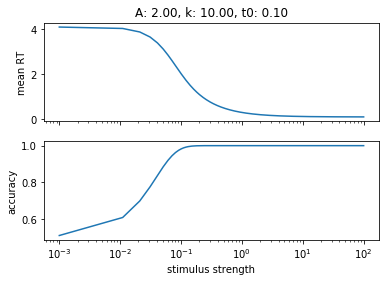

In [2]:
f, ax = ProportionalDiffusion().plot(k=10, Aprime=2, t0=.1)

To fit data, provide the reaction times, accuracy, and corresponding stimulus strengths.

We need some toy data to fit

In [3]:
# simulate data with k=10
data, params = hddm.generate.gen_rand_data({'coh0': {'v':0.01, 'a':2, 't':.3, 'sz':0, 'sv':0},
                                            'coh2': {'v':2, 'a':2, 't':.3, 'sz':0, 'sv':0},
                                            'coh4': {'v':4, 'a':2, 't':.3, 'sz':0, 'sv':0},
                                            'coh8': {'v':8, 'a':2, 't':.3, 'sz':0, 'sv':0}}, size=1000)
data['stimulus_strength'] = np.nan
data.loc[data['condition']=='coh0', 'stimulus_strength'] = .001
data.loc[data['condition']=='coh2', 'stimulus_strength'] = .20
data.loc[data['condition']=='coh4', 'stimulus_strength'] = .40
data.loc[data['condition']=='coh8', 'stimulus_strength'] = .80

In [4]:
# Fit here
model = ProportionalDiffusion(rt=data['rt'], accuracy=data['response'], stimulus_strength=data['stimulus_strength'])
model.fit()

Fitting...


/Users/steven/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


done


Parameters can be found as attributes (kinda ugly but cant be bothered):

In [5]:
print(model.Aprimefit)
print(model.kfit)
print(model.t0fit)

0.992993398347
10.6037079686
0.318063865577


Now, you can make some plots to check the fit quality

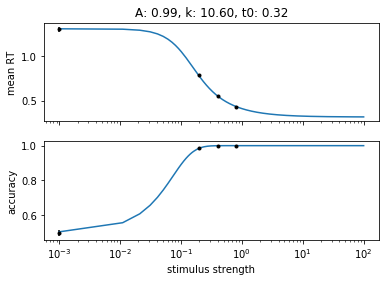

In [6]:
f, ax = model.plot()

Should be close enough...

Now, you probably want to know what stimulus strength would generate data with a given accuracy - let's say, 80%

In [7]:
stimulus_strength = model.get_stimulus_strength_for_accuracy(accuracy=.8)
print(stimulus_strength)

0.0706367570239


Add this to the plot

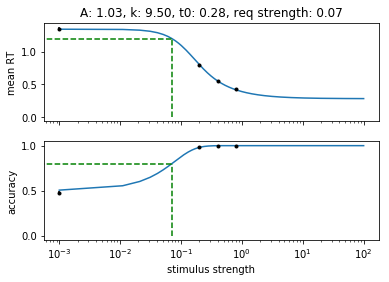

In [8]:
_ = model.plot(required_accuracy=.8)

As a final check - are we sure that this stimulus strength actually would generate 80% accuracy, assuming that the EZ/proportional diffusion model generates the data?

In [9]:
data = model.simulate_diffusion(n=1000, required_accuracy=.8)
print(data.describe())
## The mean accuracy should lie around required_accuracy

          accuracy           rt
count  1000.000000  1000.000000
mean      0.811000     1.196819
std       0.391705     0.723942
min       0.000000     0.364516
25%       1.000000     0.704757
50%       1.000000     0.993366
75%       1.000000     1.457972
max       1.000000     5.600627
